### Analise Exploratoria

Le o dataset

In [ ]:
import pandas as pd
import numpy as np
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
import math
from tabulate import tabulate

df = pd.read_csv('dataSetLimpo.csv')

Tamanho do dataset

In [52]:
track_tags = df['TrackTags'].explode()
track_tags_flat = track_tags.values.flatten()
track_tags_flat = track_tags_flat.astype(str)
unique_values, counts = np.unique(track_tags_flat, return_counts=True)

# Calula os tamanhos
dataset_size = f'{df.shape[0]} linhas e {df.shape[1]} colunas' 
num_users = len(df.groupby("UserID").count())
num_tracks = len(df.groupby("TrackID").count())
num_albums = len(df.groupby("AlbumID").count())
num_artists = len(df.groupby("ArtistID").count())
num_tags = len(unique_values)

# Criando tabela

table_data = [
    ["Tamanho do dataset", dataset_size],
    ["Numero de usuários", num_users],
    ["Numero de Tracks diferentes", num_tracks],
    ["Numero de Albuns diferentes", num_albums],
    ["Numero de Artistas diferentes", num_artists],
    ["Numero de Tags diferentes para tracks", num_tags]
]

table_headers = ["Informação", "Valor"]

print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))


╒═══════════════════════════════════════╤════════════════════════════╕
│ Informação                            │ Valor                      │
╞═══════════════════════════════════════╪════════════════════════════╡
│ Tamanho do dataset                    │ 143779 linhas e 24 colunas │
├───────────────────────────────────────┼────────────────────────────┤
│ Numero de usuários                    │ 2191                       │
├───────────────────────────────────────┼────────────────────────────┤
│ Numero de Tracks diferentes           │ 59276                      │
├───────────────────────────────────────┼────────────────────────────┤
│ Numero de Albuns diferentes           │ 27150                      │
├───────────────────────────────────────┼────────────────────────────┤
│ Numero de Artistas diferentes         │ 10170                      │
├───────────────────────────────────────┼────────────────────────────┤
│ Numero de Tags diferentes para tracks │ 100                        │
╘═════

In [53]:
import pandas as pd

# Calcula valores médio min e max
unique_tracks = df.drop_duplicates(subset='TrackID')

mean_track_listeners = unique_tracks['TrackPlaycount'].mean()
max_track_playcount = unique_tracks['TrackPlaycount'].max()
min_track_playcount = unique_tracks['TrackPlaycount'].min()

unique_artists = df.drop_duplicates(subset='ArtistID')

mean_artists_listeners = unique_artists['ArtistPlaycount'].mean()
max_track_playcount = unique_tracks['TrackPlaycount'].max()
min_track_playcount = unique_tracks['TrackPlaycount'].min()

table_data = [
    ["Valor mínimo reproduções track", min_track_playcount],
    ["Valor médio reproduções track", mean_track_listeners],
    ["Valor máximo reproduções track", max_track_playcount],
    ["Valor mínimo reproduções artista", min_track_playcount],
    ["Valor médio reproduções artista", mean_artists_listeners],
    ["Valor máximo reproduções artista", max_track_playcount]
]

# Cria tabela
table_headers = ["Informação", "Valor"]

print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))


╒══════════════════════════════════╤══════════════════╕
│ Informação                       │            Valor │
╞══════════════════════════════════╪══════════════════╡
│ Valor mínimo reproduções track   │     27           │
├──────────────────────────────────┼──────────────────┤
│ Valor médio reproduções track    │ 960373           │
├──────────────────────────────────┼──────────────────┤
│ Valor máximo reproduções track   │      1.21607e+08 │
├──────────────────────────────────┼──────────────────┤
│ Valor mínimo reproduções artista │     27           │
├──────────────────────────────────┼──────────────────┤
│ Valor médio reproduções artista  │      1.22611e+07 │
├──────────────────────────────────┼──────────────────┤
│ Valor máximo reproduções artista │      1.21607e+08 │
╘══════════════════════════════════╧══════════════════╛


Tracks Albuns e Artistas mais populares (Global)

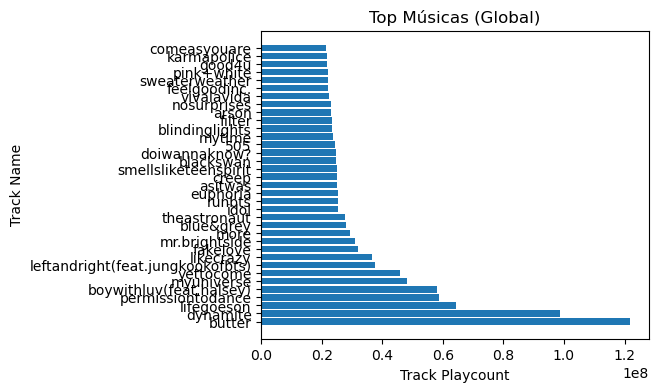

c:\Users\giova\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


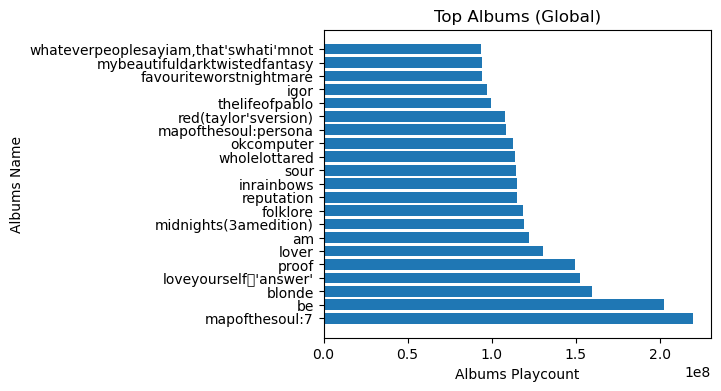

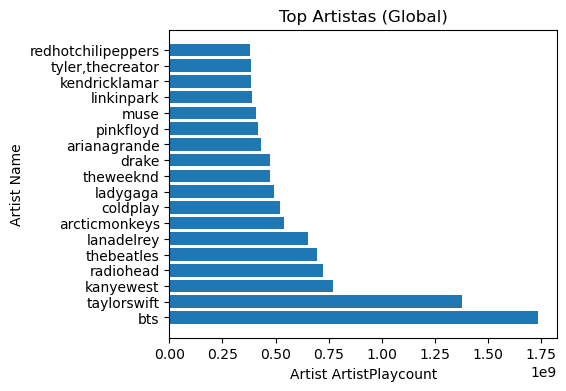

In [96]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values('TrackPlaycount', ascending=False)
top_100_unique_values = sorted_df['TrackPlaycount'].unique()[:100]
top_100_rows = sorted_df[sorted_df['TrackPlaycount'].isin(top_100_unique_values)][['TrackName', 'ArtistName', 'TrackPlaycount']]
top_100_rows.drop_duplicates(inplace=True)

plt.figure(figsize=(5,4))
plt.barh(top_100_rows['TrackName'], top_100_rows['TrackPlaycount'])
plt.xlabel('Track Playcount')
plt.ylabel('Track Name')
plt.title('Top Músicas (Global)')

plt.show()


sorted_df = df.sort_values('AlbumPlaycount', ascending=False)
top_100_unique_values = sorted_df['AlbumPlaycount'].unique()[:100]
top_100_rows = sorted_df[sorted_df['AlbumPlaycount'].isin(top_100_unique_values)][['AlbumName', 'ArtistName', 'AlbumPlaycount']]
top_100_rows.drop_duplicates(inplace=True)

plt.figure(figsize=(5,4))
plt.barh(top_100_rows['AlbumName'], top_100_rows['AlbumPlaycount'])
plt.xlabel('Albums Playcount')
plt.ylabel('Albums Name')
plt.title('Top Albums (Global)')

plt.show()

sorted_df = df.sort_values('ArtistPlaycount', ascending=False)
top_100_unique_values = sorted_df['ArtistPlaycount'].unique()[:100]
top_100_rows = sorted_df[sorted_df['ArtistPlaycount'].isin(top_100_unique_values)][['ArtistName', 'ArtistPlaycount']]
top_100_rows.drop_duplicates(inplace=True)

plt.figure(figsize=(5,4))
plt.barh(top_100_rows['ArtistName'], top_100_rows['ArtistPlaycount'])
plt.xlabel('Artist ArtistPlaycount')
plt.ylabel('Artist Name')
plt.title('Top Artistas (Global)')

plt.show()

Tracks mais populares (dataset)

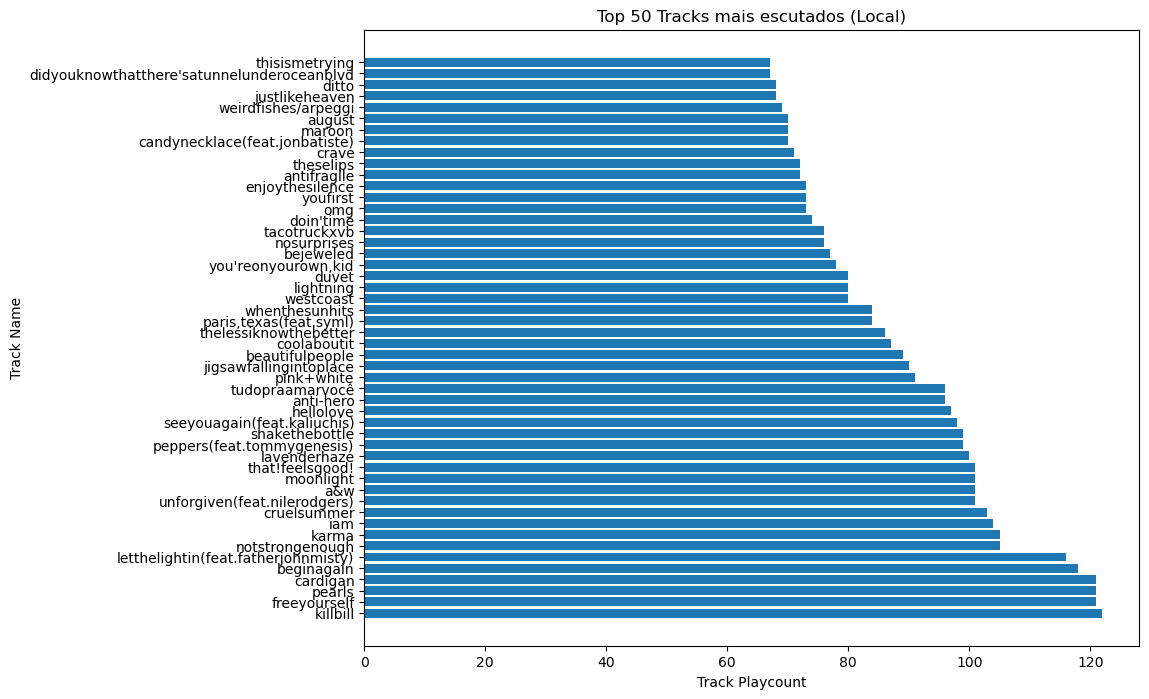

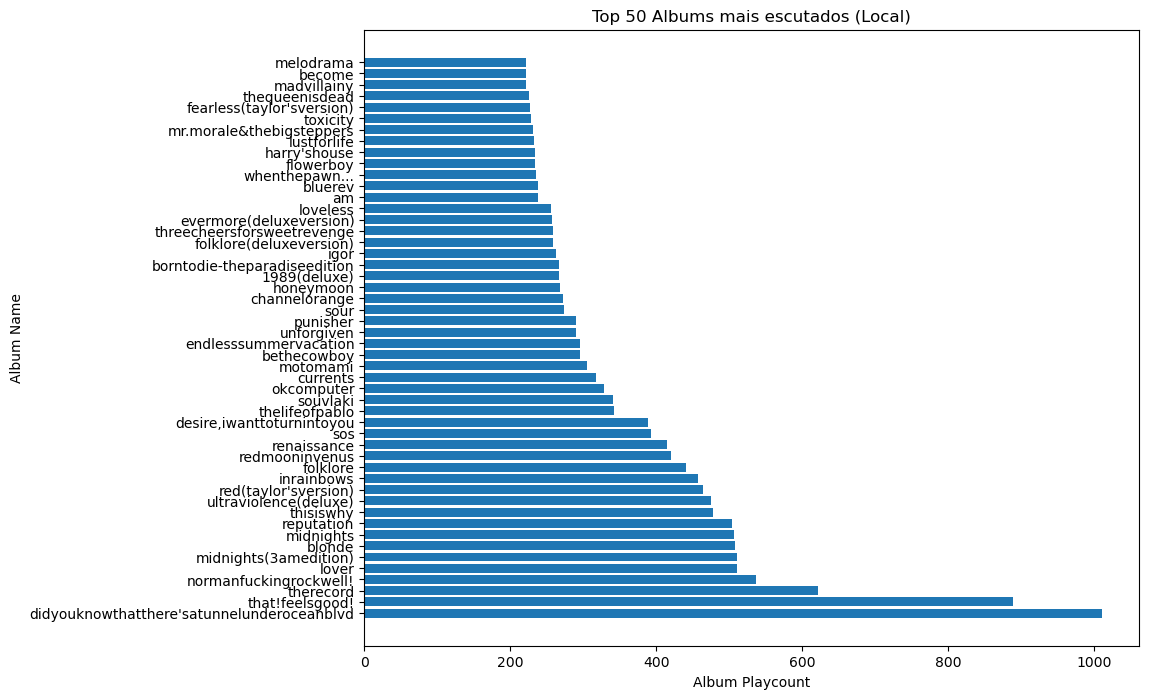

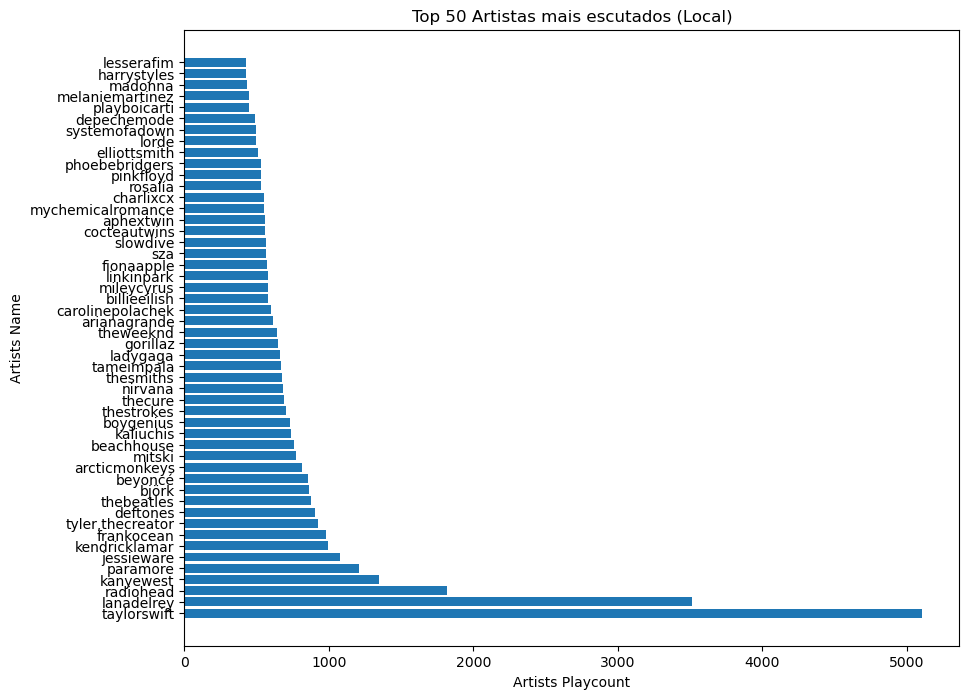

In [95]:
top_50_tracks = df.groupby(['TrackID', 'TrackName', 'ArtistName'])['Counts'].sum().nlargest(50).reset_index()
top_50_tracks[['TrackID', 'TrackName', 'ArtistName']]

plt.figure(figsize=(10,8))
plt.barh(top_50_tracks['TrackName'], top_50_tracks['Counts'])
plt.xlabel('Track Playcount')
plt.ylabel('Track Name')
plt.title('Top 50 Tracks mais escutados (Local)')

plt.show()

top_50_albums = df.groupby(['AlbumID', 'AlbumName', 'ArtistName'])['Counts'].sum().nlargest(50).reset_index()
top_50_albums[['AlbumID', 'AlbumName', 'ArtistName']]

plt.figure(figsize=(10,8))
plt.barh(top_50_albums['AlbumName'], top_50_albums['Counts'])
plt.xlabel('Album Playcount')
plt.ylabel('Album Name')
plt.title('Top 50 Albums mais escutados (Local)')

plt.show()

top_50_artists = df.groupby(['ArtistID', 'ArtistName'])['Counts'].sum().nlargest(50).reset_index()
top_50_artists[['ArtistID', 'ArtistName']]

plt.figure(figsize=(10,8))
plt.barh(top_50_artists['ArtistName'], top_50_artists['Counts'])
plt.xlabel('Artists Playcount')
plt.ylabel('Artists Name')
plt.title('Top 50 Artistas mais escutados (Local)')

plt.show()

Distribuição de counts por track

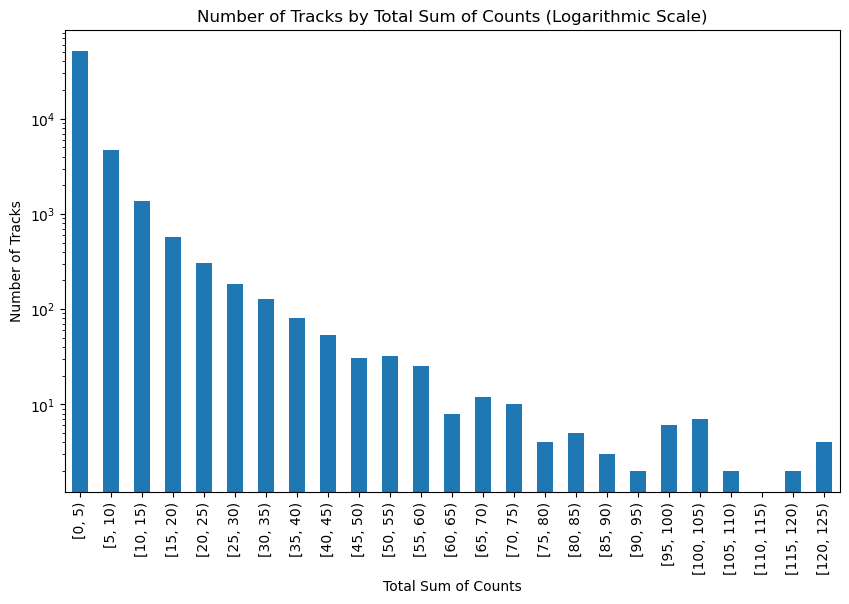

In [58]:
import matplotlib.pyplot as plt

grouped_tracks = df.groupby('TrackID')['Counts'].sum()

counts_counts = grouped_tracks.value_counts().sort_index()

bucket_size = 5
bins = range(0, max(counts_counts.index) + bucket_size, bucket_size)
binned_tracks = pd.cut(counts_counts.index, bins=bins, right=False)
bucket_counts = counts_counts.groupby(binned_tracks).sum()

plt.figure(figsize=(10, 6))
bucket_counts.plot(kind='bar')
plt.xlabel('Total Sum of Counts')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks by Total Sum of Counts (Logarithmic Scale)')
plt.yscale('log')
plt.show()


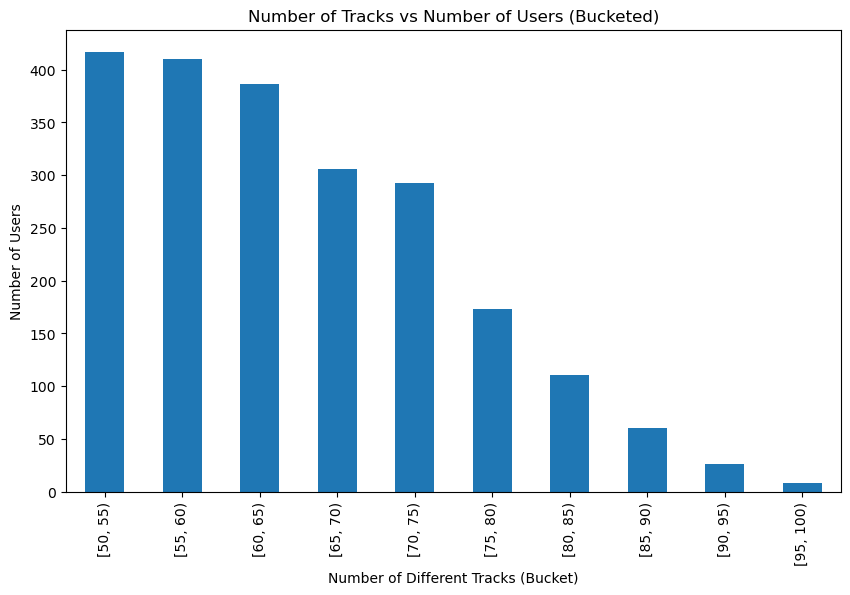

In [97]:
user_track_counts = df.groupby('UserID')['TrackID'].nunique()
tracks_per_user_counts = user_track_counts.value_counts().sort_index()

bucket_size = 5
bins = range(50, max(tracks_per_user_counts.index) + bucket_size, bucket_size)
binned_tracks = pd.cut(tracks_per_user_counts.index, bins=bins, right=False)
bucket_counts = tracks_per_user_counts.groupby(binned_tracks).sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bucket_counts.plot(kind='bar')
plt.xlabel('Number of Different Tracks (Bucket)')
plt.ylabel('Number of Users')
plt.title('Quantas músicas cada usuário ouviu')
plt.show()



rock           29289
pop            23910
indie          19865
alternative    15788
hiphop         13827
               ...  
love             714
reggae           693
jpop             672
2020s            638
cloudrap         602
Name: TrackTags, Length: 100, dtype: int64


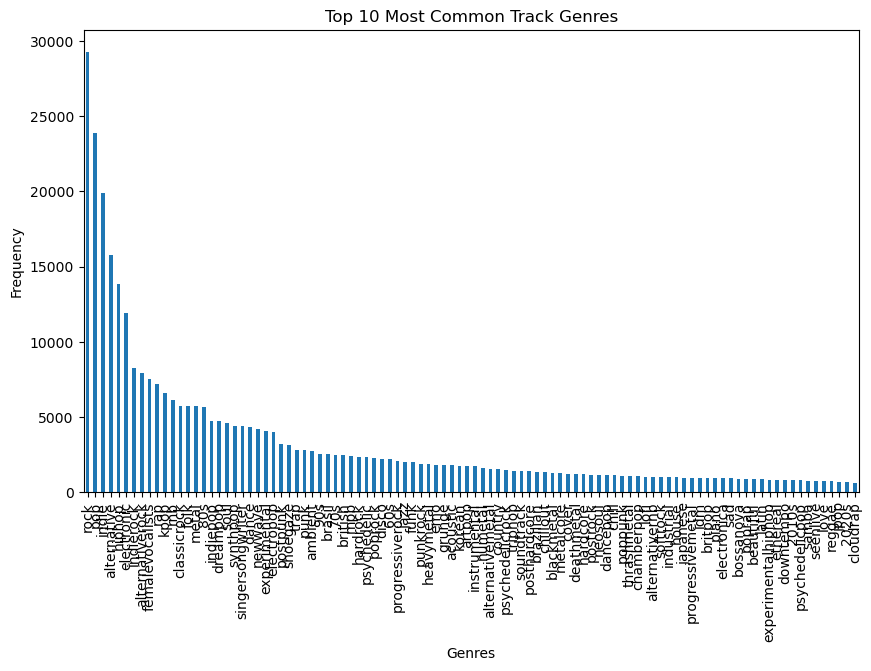

C:\Users\giova\AppData\Local\Temp\ipykernel_11672\4086807717.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genre_combinations_counts = pd.Series([combo for combos in genre_combinations for combo in combos]).value_counts()


Series([], dtype: int64)
pop                26653
rock               25433
indie              23166
femalevocalists    22234
hiphop             18210
                   ...  
spanish              573
brazilianrock        570
reggae               565
french               500
slowcore             494
Name: ArtistTags, Length: 100, dtype: int64


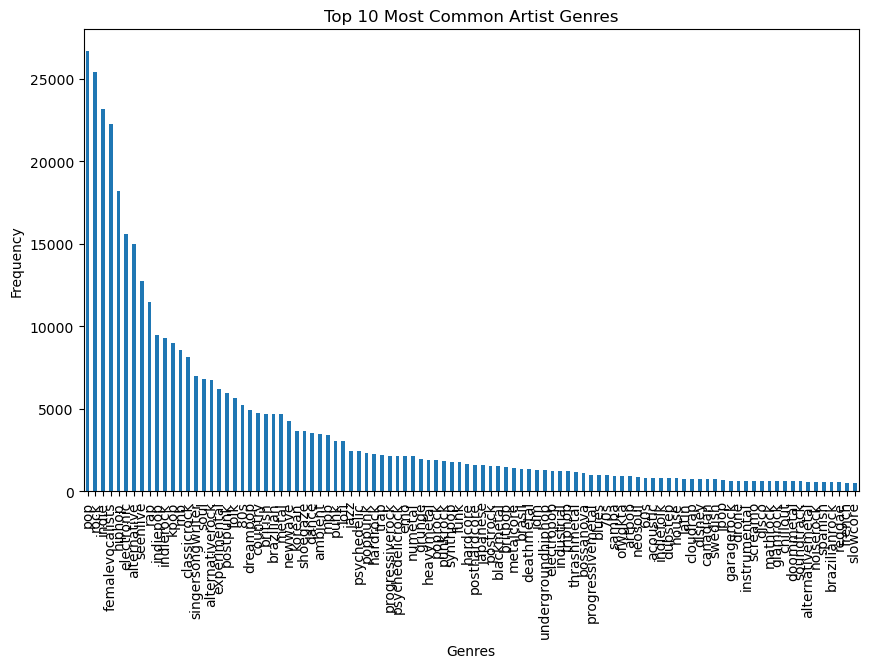

(pop, femalevocalists)            11391
(hiphop, rap)                      9468
(rock, alternative)                5604
(indie, indiepop)                  4858
(indie, indierock)                 4563
                                  ...  
(femalevocalists, alternative)      870
(dreampop, shoegaze)                859
(seenlive, folk)                    845
(trap, rap)                         841
(electronic, idm)                   838
Length: 100, dtype: int64


In [60]:
exploded_genres_tracks = df['TrackTags'].explode()
genre_counts_tracks = exploded_genres_tracks.value_counts()
top_genres_tracks = genre_counts_tracks.head(100)
print(top_genres_tracks)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_genres_tracks.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Track Genres')
plt.show()

from itertools import combinations

# Create combinations of genres
genre_combinations = genre_counts_tracks.groupby(level=0).apply(lambda x: list(combinations(x, 2)))

# Count the frequencies of genre combinations
genre_combinations_counts = pd.Series([combo for combos in genre_combinations for combo in combos]).value_counts()

print(genre_combinations_counts.head(100))


exploded_genres_artists = df['ArtistTags'].explode()
genre_counts_artists = exploded_genres_artists.value_counts()
top_genres_artists = genre_counts_artists.head(100)
print(top_genres_artists)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_genres_artists.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Artist Genres')
plt.show()

from itertools import combinations

# Create combinations of genres
genre_combinations = exploded_genres_artists.groupby(level=0).apply(lambda x: list(combinations(x, 2)))

# Count the frequencies of genre combinations
genre_combinations_counts = pd.Series([combo for combos in genre_combinations for combo in combos]).value_counts()

print(genre_combinations_counts.head(100))



